In [1]:
# %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()
# Combine the data into a single dataset
city_ride_df = pd.merge(ride_data, city_data,
                                 how='outer', on='city')


# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

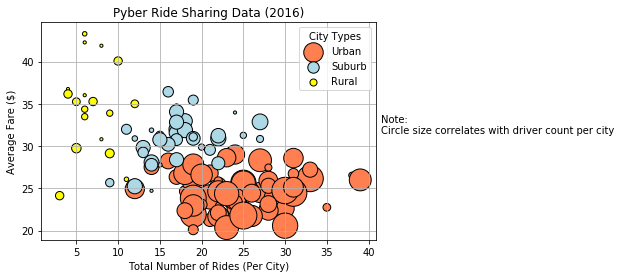

<Figure size 432x288 with 0 Axes>

In [2]:

#Filtering the cities based on type
rural_df = city_ride_df.loc[city_ride_df["type"]=="Rural"]
suburban_df = city_ride_df.loc[city_ride_df["type"]=="Suburban"]
urban_df = city_ride_df.loc[city_ride_df["type"]=="Urban"]

# Obtain the x and y coordinates for each of the three city types
#Calculating the total rides, average fare per city and average total drivers per city for each city type

#RURAL
ruralcity_grpby = rural_df.groupby(["city"])

rural_total_rides_percity = ruralcity_grpby["ride_id"].count()

rural_avg_fare_percity = ruralcity_grpby["fare"].mean()

rural_totaldrivers_percity = ruralcity_grpby["driver_count"].mean()

#SUBURBAN
suburbcity_grpby = suburban_df.groupby(["city"])

suburb_total_rides_percity = suburbcity_grpby["ride_id"].count()

suburb_avg_fare_percity = suburbcity_grpby["fare"].mean()

suburb_totaldrivers_percity = suburbcity_grpby["driver_count"].mean()

#URBAN
urbancity_grpby = urban_df.groupby(["city"])

urb_total_rides_percity = urbancity_grpby["ride_id"].count()

urb_avg_fare_percity = urbancity_grpby["fare"].mean()

urb_totaldrivers_percity = urbancity_grpby["driver_count"].mean() 


# Build the scatter plots for each city types

fig, ax = plt.subplots()
ax.scatter(urb_total_rides_percity, urb_avg_fare_percity,s=urb_totaldrivers_percity*10, 
           marker ='o', facecolors ="coral", edgecolors='black',alpha = 1, label="Urban")
ax.scatter(suburb_total_rides_percity, suburb_avg_fare_percity,s=suburb_totaldrivers_percity*10, 
           marker ='o', facecolors ="lightblue", edgecolors='black',alpha = 1, label="Suburb")
ax.scatter(rural_total_rides_percity, rural_avg_fare_percity,s=rural_totaldrivers_percity*10, 
           marker ='o', facecolors ="yellow", edgecolors='black',alpha = 1, label="Rural")

# Incorporate a text label regarding circle size
ax.text(40+1.5, 30+1.5, "Note: \nCircle size correlates with driver count per city", 
        horizontalalignment='left', size='medium', color='black')

ax.grid(True)

# Create a legend
ax.legend(title ="City Types", loc="upper right")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Show plot
plt.show()

# Save Figure
plt.savefig("data/PyberRideSharingData.png", bbox_inches='tight')

## Total Fares by City Type

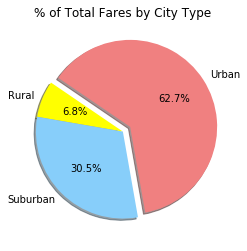

In [3]:
#Total fare per city type
rural_total_fare = rural_df["fare"].sum()
suburb_total_fare = suburban_df["fare"].sum()
urban_total_fare = urban_df["fare"].sum()

total_fare = rural_total_fare + suburb_total_fare + urban_total_fare
# Calculate Type Percents
urban_fare_percent = round((urban_total_fare/total_fare)*100,1)
suburb_fare_percent = round((suburb_total_fare/total_fare)*100,1)
rural_fare_percent = round((rural_total_fare/total_fare)*100,1)

# Build Pie Chart
sizes = [urban_fare_percent, rural_fare_percent, suburb_fare_percent]
labels = ['Urban','Rural','Suburban']
colors = ["lightcoral", "yellow", "lightskyblue", ]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("data/TotalFaresbyCityType.png", bbox_inches='tight')

#Show Plot
plt.show()

## Total Rides by City Type

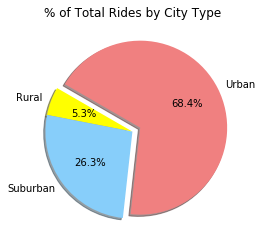

In [4]:
# Calculate Ride Percents
ride_df = city_ride_df.groupby(["type"])
ride_numbers = ride_df["ride_id"].count()


# Build Pie Chart
labels = ['Rural','Suburban','Urban']
colors = ["yellow", "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(ride_numbers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("data/TotalRidesbyCityType.png")
# Show Figure
plt.show()

## Total Drivers by City Type

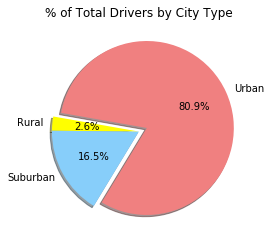

In [5]:
# Calculate Driver Percents
driver_df = city_data.groupby(["type"])
total_driver_count = driver_df["driver_count"].sum()

# Build Pie Chart
labels = ['Rural','Suburban','Urban']
colors = ["yellow", "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(total_driver_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("data/TotalDriversbyCityType.png")

# Show Figure
plt.show()
